# Project: Analysis of Airline Delay and Cancellation Data, 2009 - 2018

A 2010 report sponsored by the Federal Aviation Administration (FAA) analyzed a variety of cost components caused by flight delays. This included the cost to airlines, cost to passengers, cost of lost demand, as well as the indirect impact of delay on the US economy. The report concluded that the total cost of all US air transportation delays in 2007 was **$32.9 billion**. Clearly, flight delays are a serious and widespread problem in the US. An exploration of multi-year (2009 - 2018) airline delay and cancellation data will be made to determine the causes of airline delays.

Import required libraries:

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Magic word for producing visualizations in notebook.
%matplotlib inline

# Display all columns.
pd.set_option('display.max_columns', None)

## Loading the Data:

Airline Delay and Cancellation Data datasets were collected from www.kaggle.com. This data has been combined from multiple US Government (Bureau of Transportation Statistics) datasets. This department was founded in 1966 and its mandate was to collect and disseminate transportation statistics. It provides various publicly downloadable datasets.

Note that I will not use any restricted, private, or propriety data in this analysis.

These datasets will be cleansed and combined to form a multi-year dataset, in an effort to offer additional insights.

There are ten data files associated with this project:

- `2009.csv`: Airline Delay and Cancellation Data dataset for 2009.
- `2010.csv`: Airline Delay and Cancellation Data dataset for 2010.
- `2011.csv`: Airline Delay and Cancellation Data dataset for 2011.
- `2012.csv`: Airline Delay and Cancellation Data dataset for 2012.
- `2013.csv`: Airline Delay and Cancellation Data dataset for 2013.
- `2014.csv`: Airline Delay and Cancellation Data dataset for 2014.
- `2015.csv`: Airline Delay and Cancellation Data dataset for 2015.
- `2016.csv`: Airline Delay and Cancellation Data dataset for 2016.
- `2017.csv`: Airline Delay and Cancellation Data dataset for 2017.
- `2018.csv`: Airline Delay and Cancellation Data dataset for 2018.

### Load the datasets for 2009 to 2018:

Load each dataset from its corresponding data file:

In [2]:
# Load the 2009 dataset.
year_2009 = pd.read_csv('airline-data\\2009.csv', sep = ',')

# Load the 2010 dataset.
year_2010 = pd.read_csv('airline-data\\2010.csv', sep = ',')

# Load the 2011 dataset.
year_2011 = pd.read_csv('airline-data\\2011.csv', sep = ',')

# Load the 2012 dataset.
year_2012 = pd.read_csv('airline-data\\2012.csv', sep = ',')

# Load the 2013 dataset.
year_2013 = pd.read_csv('airline-data\\2013.csv', sep = ',')

# Load the 2014 dataset.
year_2014 = pd.read_csv('airline-data\\2014.csv', sep = ',')

# Load the 2015 dataset.
year_2015 = pd.read_csv('airline-data\\2015.csv', sep = ',')

# Load the 2016 dataset.
year_2016 = pd.read_csv('airline-data\\2016.csv', sep = ',')

# Load the 2017 dataset.
year_2017 = pd.read_csv('airline-data\\2017.csv', sep = ',')

# Load the 2018 dataset.
year_2018 = pd.read_csv('airline-data\\2018.csv', sep = ',')

Display the number of rows and columns in each dataset:

In [3]:
# Display the number of rows and columns in each dataset.
print("2009 dataset:", year_2009.shape)
print("2010 dataset:", year_2010.shape)
print("2011 dataset:", year_2011.shape)
print("2012 dataset:", year_2012.shape)
print("2013 dataset:", year_2013.shape)
print("2014 dataset:", year_2014.shape)
print("2015 dataset:", year_2015.shape)
print("2016 dataset:", year_2016.shape)
print("2017 dataset:", year_2017.shape)
print("2018 dataset:", year_2018.shape)

2009 dataset: (6429338, 28)
2010 dataset: (6450117, 28)
2011 dataset: (6066650, 28)
2012 dataset: (6096762, 28)
2013 dataset: (6369482, 28)
2014 dataset: (5819811, 28)
2015 dataset: (5819079, 28)
2016 dataset: (5617658, 28)
2017 dataset: (5674621, 28)
2018 dataset: (7213446, 28)


Display sample data from each dataset:

In [4]:
# Display a sample of the dataset.
year_2009.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Display a sample of the dataset.
year_2010.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2010-01-01,MQ,4438,LGA,RDU,1940,2101.0,81.0,14.0,2115.0,2225.0,22.0,2130,2247.0,77.0,0.0,NaN,0.0,110.0,106.0,70.0,431.0,0.0,0.0,0.0,0.0,77.0,NaN
1,2010-01-01,MQ,4440,DCA,JFK,950,949.0,-1.0,13.0,1002.0,1040.0,9.0,1100,1049.0,-11.0,0.0,NaN,0.0,70.0,60.0,38.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-01,MQ,4443,LGA,RDU,900,937.0,37.0,11.0,948.0,1105.0,3.0,1100,1108.0,8.0,0.0,NaN,0.0,120.0,91.0,77.0,431.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-01,MQ,4445,RDU,LGA,1940,1935.0,-5.0,12.0,1947.0,2051.0,4.0,2120,2055.0,-25.0,0.0,NaN,0.0,100.0,80.0,64.0,431.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-01,MQ,4447,JFK,DCA,2035,2236.0,121.0,18.0,2254.0,2341.0,1.0,2200,2342.0,102.0,0.0,NaN,0.0,85.0,66.0,47.0,213.0,0.0,0.0,0.0,0.0,102.0,NaN


In [6]:
# Display a sample of the dataset.
year_2011.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2011-01-01,MQ,4529,BOS,JFK,1830,1823.0,-7.0,68.0,1931.0,2019.0,30.0,2000,2049.0,49.0,0.0,NaN,0.0,90.0,146.0,48.0,187.0,0.0,0.0,49.0,0.0,0.0,NaN
1,2011-01-01,MQ,4532,BNA,DCA,1100,1052.0,-8.0,11.0,1103.0,1317.0,3.0,1335,1320.0,-15.0,0.0,NaN,0.0,95.0,88.0,74.0,562.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-01,MQ,4532,DCA,JFK,1400,1358.0,-2.0,9.0,1407.0,1507.0,4.0,1519,1511.0,-8.0,0.0,NaN,0.0,79.0,73.0,60.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-01,MQ,4537,RDU,JFK,1710,1706.0,-4.0,59.0,1805.0,1930.0,15.0,1855,1945.0,50.0,0.0,NaN,0.0,105.0,159.0,85.0,426.0,0.0,0.0,50.0,0.0,0.0,NaN
4,2011-01-01,MQ,4540,CMH,LGA,1340,1340.0,0.0,14.0,1354.0,1511.0,4.0,1525,1515.0,-10.0,0.0,NaN,0.0,105.0,95.0,77.0,478.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Display a sample of the dataset.
year_2012.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2012-01-01,MQ,4041,BMI,ORD,1715.0,1702.0,-13.0,9.0,1711.0,1748.0,9.0,1810.0,1757.0,-13.0,0.0,NaN,0.0,55.0,55.0,37.0,116.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-01,MQ,4041,ORD,BMI,1545.0,1540.0,-5.0,11.0,1551.0,1614.0,5.0,1635.0,1619.0,-16.0,0.0,NaN,0.0,50.0,39.0,23.0,116.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-01,MQ,4042,SGF,ORD,715.0,705.0,-10.0,12.0,717.0,832.0,18.0,910.0,850.0,-20.0,0.0,NaN,0.0,115.0,105.0,75.0,438.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-01,MQ,4045,ORD,DBQ,1535.0,1529.0,-6.0,13.0,1542.0,1613.0,2.0,1630.0,1615.0,-15.0,0.0,NaN,0.0,55.0,46.0,31.0,147.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-01,MQ,4047,ORD,RIC,1600.0,1615.0,15.0,12.0,1627.0,1853.0,11.0,1855.0,1904.0,9.0,0.0,NaN,0.0,115.0,109.0,86.0,642.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Display a sample of the dataset.
year_2013.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2013-01-01,VX,108,LAX,IAD,700,700.0,0.0,8.0,708.0,1411.0,7.0,1445,1418.0,-27.0,0.0,NaN,0.0,285.0,258.0,243.0,2288.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01,VX,114,LAX,IAD,2205,2204.0,-1.0,12.0,2216.0,523.0,13.0,545,536.0,-9.0,0.0,NaN,0.0,280.0,272.0,247.0,2288.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01,VX,11,JFK,SFO,730,729.0,-1.0,18.0,747.0,1043.0,6.0,1115,1049.0,-26.0,0.0,NaN,0.0,405.0,380.0,356.0,2586.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01,VX,121,PHL,LAX,700,700.0,0.0,14.0,714.0,1006.0,8.0,1000,1014.0,14.0,0.0,NaN,0.0,360.0,374.0,352.0,2402.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01,VX,124,LAX,PHL,1100,1104.0,4.0,12.0,1116.0,1828.0,9.0,1915,1837.0,-38.0,0.0,NaN,0.0,315.0,273.0,252.0,2402.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Display a sample of the dataset.
year_2014.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2014-01-01,AA,2377,ICT,DFW,1135,1144.0,9.0,12.0,1156.0,1253.0,9.0,1300,1302.0,2.0,0.0,NaN,0.0,85.0,78.0,57.0,328.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01,AA,2378,MIA,TPA,2225,2220.0,-5.0,14.0,2234.0,2311.0,4.0,2325,2315.0,-10.0,0.0,NaN,0.0,60.0,55.0,37.0,204.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-01,EV,2500,DFW,HOU,2105,NaN,NaN,NaN,NaN,NaN,NaN,2205,NaN,NaN,1.0,A,0.0,60.0,NaN,NaN,247.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-01,EV,2502,CRW,DFW,1655,1805.0,70.0,6.0,1811.0,1941.0,24.0,1900,2005.0,65.0,0.0,NaN,0.0,185.0,180.0,150.0,946.0,0.0,0.0,0.0,0.0,65.0,NaN
4,2014-01-01,EV,2502,DFW,CRW,1320,1440.0,80.0,9.0,1449.0,1730.0,5.0,1625,1735.0,70.0,0.0,NaN,0.0,125.0,115.0,101.0,946.0,6.0,0.0,0.0,0.0,64.0,NaN


In [10]:
# Display a sample of the dataset.
year_2015.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,2238.0,7.0,2250,2245.0,-5.0,0.0,NaN,0.0,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,1354.0,9.0,1404,1403.0,-1.0,0.0,NaN,0.0,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,803.0,10.0,757,813.0,16.0,0.0,NaN,0.0,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,2343.0,4.0,2356,2347.0,-9.0,0.0,NaN,0.0,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,830.0,10.0,855,840.0,-15.0,0.0,NaN,0.0,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Display a sample of the dataset.
year_2016.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2016-01-01,DL,1248,DTW,LAX,1935,1935.0,0.0,23.0,1958.0,2107.0,13.0,2144,2120.0,-24.0,0.0,NaN,0.0,309.0,285.0,249.0,1979.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01,DL,1251,ATL,GRR,2125,2130.0,5.0,13.0,2143.0,2315.0,4.0,2321,2319.0,-2.0,0.0,NaN,0.0,116.0,109.0,92.0,640.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01,DL,1254,LAX,ATL,2255,2256.0,1.0,19.0,2315.0,542.0,5.0,600,547.0,-13.0,0.0,NaN,0.0,245.0,231.0,207.0,1947.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01,DL,1255,SLC,ATL,1656,1700.0,4.0,12.0,1712.0,2205.0,8.0,2229,2213.0,-16.0,0.0,NaN,0.0,213.0,193.0,173.0,1590.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01,DL,1256,BZN,MSP,900,1012.0,72.0,63.0,1115.0,1416.0,4.0,1216,1420.0,124.0,0.0,NaN,0.0,136.0,188.0,121.0,874.0,72.0,0.0,52.0,0.0,0.0,NaN


In [12]:
# Display a sample of the dataset.
year_2017.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2017-01-01,AA,1,JFK,LAX,800,831.0,31.0,25.0,856.0,1143.0,26.0,1142,1209.0,27.0,0.0,NaN,0.0,402.0,398.0,347.0,2475.0,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,2,LAX,JFK,900,934.0,34.0,34.0,1008.0,1757.0,12.0,1727,1809.0,42.0,0.0,NaN,0.0,327.0,335.0,289.0,2475.0,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,4,LAX,JFK,1130,1221.0,51.0,20.0,1241.0,2025.0,15.0,1958,2040.0,42.0,0.0,NaN,0.0,328.0,319.0,284.0,2475.0,7.0,0.0,0.0,0.0,35.0,NaN
3,2017-01-01,AA,5,DFW,HNL,1135,1252.0,77.0,19.0,1311.0,1744.0,5.0,1612,1749.0,97.0,0.0,NaN,0.0,517.0,537.0,513.0,3784.0,77.0,0.0,20.0,0.0,0.0,NaN
4,2017-01-01,AA,6,OGG,DFW,1855,1855.0,0.0,16.0,1911.0,631.0,11.0,600,642.0,42.0,0.0,NaN,0.0,425.0,467.0,440.0,3711.0,0.0,0.0,42.0,0.0,0.0,NaN


In [13]:
# Display a sample of the dataset.
year_2018.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


### Create the main dataset that holds the 2009 to 2018 data:

Concatenate the datasets to form a new dataset:

In [14]:
# Concatenate the datasets to form a single dataset.
all_years = [year_2009, year_2010, year_2011, year_2012, year_2013,
             year_2014, year_2015, year_2016, year_2017, year_2018]
flights = pd.concat(all_years)

Show the number of rows and columns of the new dataset:

In [15]:
# Display the rows and columns in the dataset.
print("flights rows x columns:", flights.shape)

flights rows x columns: (61556964, 28)


Show sample data from the new dataset:

In [16]:
# Show sample data for this dataset.
flights.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2009-01-01,XE,1204,DCA,EWR,1100.0,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202.0,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510.0,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632.0,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100.0,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210.0,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240.0,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357.0,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715.0,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900.0,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN


Display the dataset structure:

In [17]:
# Display the dataset structure.
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61556964 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         float64
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         float64
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 2

## Cleansing the Dataset:

The combined dataset has a number of issues that require fixing.

### Determine the pattern of NaNs in the dataset:

Find all columns that contain NaNs:

In [18]:
# Find all columns containing NaN values.
columns_with_nans = flights.loc[:, flights.isnull().any()].columns
print(columns_with_nans)

Index(['CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLATION_CODE', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 27'],
      dtype='object')


Define a function to calculate the percentage of NaNs in each column:

In [19]:
# Function to calculate the percentage of NaN values in each column.
def nan_percentage(df):
    return df.isna().sum()/(len(df)) * 100

Show the percentage of NaNs in each column:

In [20]:
# Display the percentage of NaNs in each column.
print(nan_percentage(flights))

FL_DATE                  0.000000
OP_CARRIER               0.000000
OP_CARRIER_FL_NUM        0.000000
ORIGIN                   0.000000
DEST                     0.000000
CRS_DEP_TIME             0.000002
DEP_TIME                 1.520093
DEP_DELAY                1.528137
TAXI_OUT                 1.565868
WHEELS_OFF               1.565860
WHEELS_ON                1.619664
TAXI_IN                  1.619662
CRS_ARR_TIME             0.000003
ARR_TIME                 1.619662
ARR_DELAY                1.821648
CANCELLED                0.000000
CANCELLATION_CODE       98.419011
DIVERTED                 0.000000
CRS_ELAPSED_TIME         0.000097
ACTUAL_ELAPSED_TIME      1.817429
AIR_TIME                 1.817427
DISTANCE                 0.000000
CARRIER_DELAY           81.495611
WEATHER_DELAY           81.495611
NAS_DELAY               81.495611
SECURITY_DELAY          81.495611
LATE_AIRCRAFT_DELAY     81.495611
Unnamed: 27            100.000000
dtype: float64


The `Unnamed: 27` column contains only NaNs which will be dropped from dataset.

Since cancelled flights are not delayed flights, all non-cancelled flights will be removed  from the dataset.

The `CARRIER_DELAY`, `WEATHER_DELAY`, `NAS_DELAY`, `SECURITY_DELAY`, and `LATE_AIRCRAFT_DELAY` columns contain NaNs which mean no delay, i.e. a delay of zero minutes, which is why they will be replaced with zeroes in these columns.

After examining the dataset and looking at the percentage of columns containing NaNs, those columns with a low percentage (less than two percent) of NaNs correspond to rows that have missing data. These rows will be removed from the dataset.

### Remove column(s) only containing NaNs:

The `Unnamed: 27` column will be dropped from the dataset and the number of rows and columns will be displayed to show that the column has been removed:

In [21]:
# Remove 'Unnamed: 27' column since it is all NaNs.
flights.drop(['Unnamed: 27'], axis = 1, inplace = True)

# Show row and column count.
print("flights rows x columns:", flights.shape)

flights rows x columns: (61556964, 27)


Show a sample of the dataset that shows `Unnamed: 27` is gone:

In [22]:
# Show a sample of the dataset without the 'Unnamed: 27' column.
flights.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2009-01-01,XE,1204,DCA,EWR,1100.0,1058.0,-2.0,18.0,1116.0,1158.0,8.0,1202.0,1206.0,4.0,0.0,NaN,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510.0,1509.0,-1.0,28.0,1537.0,1620.0,4.0,1632.0,1624.0,-8.0,0.0,NaN,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100.0,1059.0,-1.0,20.0,1119.0,1155.0,6.0,1210.0,1201.0,-9.0,0.0,NaN,0.0,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240.0,1249.0,9.0,10.0,1259.0,1336.0,9.0,1357.0,1345.0,-12.0,0.0,NaN,0.0,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715.0,1705.0,-10.0,24.0,1729.0,1809.0,13.0,1900.0,1822.0,-38.0,0.0,NaN,0.0,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN


### Remove cancelled and diverted flights from the dataset:

Cancelled and diverted flights will be removed from the dataset as they are not delayed flights. The `CANCELLED` column contains one of two values: 0 - not cancelled; 1 - cancelled. The `CANCELLED` and `CANCELLATION_CODE` columns will be removed from the dataset since they are now extraneous. The `DIVERTED` columns contains one of two values: 0 - not diverted; 1 - diverted. The `DIVERTED` column will be removed from the dataset since it now extraneous.

Remove the cancelled and diverted flights from the main dataset:

In [27]:
# Cancelled and diverted flights are removed from the main dataset.

# Show the number of rows and columns before the cancelled and diverted flights are removed.
print("Before removing cancelled flights:", flights.shape)

# Remove cancelled flights.
flights = flights[(flights['CANCELLED'] == 0)]
print("After removing cancelled flights:", flights.shape)

# Remove diverted flights.
flights = flights[(flights['DIVERTED'] == 0)]
print("After removing diverted flights:", flights.shape)

# Show the number of rows and columns after all cancelled and diverted flights are removed from the main dataset.
print("After removing cancelled and diverted flights:", flights.shape)

Before removing cancelled flights: (61556964, 27)
After removing cancelled flights: (60583755, 27)
After removing diverted flights: (60438213, 27)
After removing cancelled and diverted flights: (60438213, 27)


The `CANCELLED`, `CANCELLATION_CODE` and `DIVERTED` columns are removed from the main dataset, since they are not needed, and the number of rows and columns in the main dataset are displayed:

In [29]:
# Remove CANCELLED, CANCELLATION_CODE and DIVERTED columns from the dataset.
flights.drop(['CANCELLED'], axis = 1, inplace = True)
flights.drop(['CANCELLATION_CODE'], axis = 1, inplace = True)
flights.drop(['DIVERTED'], axis = 1, inplace = True)

# Show the number of rows and columns after the columns have been removed.
print("Remaining rows x columns:", flights.shape)

Remaining rows x columns: (60438213, 24)


### Replace NaNs with zeroes in the final five delay columns:

NaNs are replaced with zero in the `CARRIER_DELAY`, `WEATHER_DELAY`, `NAS_DELAY`, `SECURITY_DELAY`, and `LATE_AIRCRAFT_DELAY` columns as these NaNs mean no delay, i.e. zero minutes. The number of rows and columns in the main dataset will be displayed to show that no rows or columns are removed:

In [30]:
# Replace NaNs with zeroes in final five DELAY columns.
flights["CARRIER_DELAY"] = flights["CARRIER_DELAY"].fillna(0)
flights["WEATHER_DELAY"] = flights["WEATHER_DELAY"].fillna(0)
flights["NAS_DELAY"] = flights["NAS_DELAY"].fillna(0)
flights["SECURITY_DELAY"] = flights["SECURITY_DELAY"].fillna(0)
flights["LATE_AIRCRAFT_DELAY"] = flights["LATE_AIRCRAFT_DELAY"].fillna(0)

# Display rows and columns after the replacement to show no rows or columns have been removed.
print("flights rows x columns:", flights.shape)

flights rows x columns: (60438213, 24)


### Remove rows corresponding columns with less than two percent of NaNs:

All the rows that contain NaNs in the `CRS_DEP_TIME`, `DEP_DELAY`, `WHEELS_ON`, `CRS_ARR_TIME`, `ARR_TIME`, `CRS_ELAPSED_TIME`, `ACTUAL_ELAPSED_TIME`, and `AIR_TIME` columns will be removed from the dataset. A row and column count will be displayed to show the final row count:

In [31]:
# Remove rows that contain NaNs.
flights.dropna(subset = ['ARR_DELAY',
                         'CRS_DEP_TIME',
                         'DEP_DELAY',
                         'WHEELS_ON',
                         'CRS_ARR_TIME',
                         'CRS_ELAPSED_TIME',
                         'ACTUAL_ELAPSED_TIME',
                         'AIR_TIME'
                        ], inplace = True)

# Display the rows amd columns after the NaNs rows are removed.
print("flights rows x columns:", flights.shape)

flights rows x columns: (60431020, 24)


All of the rows with NaNs were removed. This can be verified by calculating the percentage of NaN values in each column again using the previously defined function:

In [33]:
# Show percentage of NaN values in each column.
print(nan_percentage(flights))

FL_DATE                0.0
OP_CARRIER             0.0
OP_CARRIER_FL_NUM      0.0
ORIGIN                 0.0
DEST                   0.0
CRS_DEP_TIME           0.0
DEP_TIME               0.0
DEP_DELAY              0.0
TAXI_OUT               0.0
WHEELS_OFF             0.0
WHEELS_ON              0.0
TAXI_IN                0.0
CRS_ARR_TIME           0.0
ARR_TIME               0.0
ARR_DELAY              0.0
CRS_ELAPSED_TIME       0.0
ACTUAL_ELAPSED_TIME    0.0
AIR_TIME               0.0
DISTANCE               0.0
CARRIER_DELAY          0.0
WEATHER_DELAY          0.0
NAS_DELAY              0.0
SECURITY_DELAY         0.0
LATE_AIRCRAFT_DELAY    0.0
dtype: float64


There are no more NaNs left in the dataset.

### Make the dataset more readable:

The dataset will be made easier to read.  The IATA codes will be replaced with the corresponding airline business names. This website provided the airline names: https://www.iata.org/en/publications/directories/code-search/.

A list of all unique IATA codes in the dataset will be generated:

In [34]:
# Show all the unique IATA codes in the dataset.
flights.OP_CARRIER.unique()

array(['XE', 'YV', 'NW', 'OH', 'OO', 'UA', 'US', 'WN', 'EV', 'F9', 'FL',
       'HA', 'MQ', '9E', 'AA', 'AS', 'B6', 'CO', 'DL', 'VX', 'NK', 'G4',
       'YX'], dtype=object)

The IATA codes will be replaced with the airline business name:

In [35]:
# Replace the IATA codes with the airline business name.
flights['OP_CARRIER'].replace({
    '9E': 'Endeavor Air',
    'AA': 'American Airlines Inc.',
    'AS': 'Alaska Airlines Inc.',
    'B6': 'JetBlue Airways Corporation',
    'CO': 'Continental Airlines',
    'DL': 'Delta Air Lines Inc.',
    'EV': 'ExpressJet Airlines, Inc.',
    'F9': 'Frontier Airlines, Inc.',
    'FL': 'AirTran Airways',
    'G4': 'Allegiant Air LLC',
    'HA': 'Hawaiian Airlines, Inc.',
    'MQ': 'Envoy Air Inc.',
    'NK': 'Spirit Airlines',
    'NW': 'Northwest Airlines',
    'OH': 'PSA Airlines, Inc.',
    'OO': 'SkyWest Airlines',
    'UA': 'United Airlines Inc.',
    'US': 'US Airways',
    'VX': 'Virgin America',
    'WN': 'Southwest Airlines Co.',
    'YV': 'Mesa Airlines, Inc.',
    'YX': 'Republic Airways Inc',
    'XE': 'JSX Air'
}, inplace = True)

Confirm that no IATA codes were left in the dataset:

In [36]:
# Confirm that all IATA codes have been replaced with airline business names.
flights.OP_CARRIER.unique()

array(['JSX Air', 'Mesa Airlines, Inc.', 'Northwest Airlines',
       'PSA Airlines, Inc.', 'SkyWest Airlines', 'United Airlines Inc.',
       'US Airways', 'Southwest Airlines Co.',
       'ExpressJet Airlines, Inc.', 'Frontier Airlines, Inc.',
       'AirTran Airways', 'Hawaiian Airlines, Inc.', 'Envoy Air Inc.',
       'Endeavor Air', 'American Airlines Inc.', 'Alaska Airlines Inc.',
       'JetBlue Airways Corporation', 'Continental Airlines',
       'Delta Air Lines Inc.', 'Virgin America', 'Spirit Airlines',
       'Allegiant Air LLC', 'Republic Airways Inc'], dtype=object)

### Remove non-delayed flights from the dataset:

The `ARR_DELAY` and `DEP_DELAY` columns show positive numbers, representing minutes of delay (`ARR_DELAY` is a summation of any delays, in minutes, for carrier delay, weather delay, NAS delay, security delay, and late aircraft delay), if a flight was delayed.

A delayed flight is a flight that arrives late at its destination. However, since a flight that was delayed on departure could still arrive on time, then only `ARR_DELAY` times that are positive are actual delayed flights.

Non-delayed flights will be removed from the main dataset as they are not part of the analysis and the number of rows and columns left in the dataset will be displayed:

In [37]:
# Remove non-delayed flights from the dataset.
flights = flights[(flights['ARR_DELAY'] > 0)]

# Show the rows and columns for the dataset.
print("flights rows x columns:", flights.shape)

flights rows x columns: (22562655, 24)


Show the structure of the cleansed dataset:

In [38]:
# Show the structure of the cleansed dataset.
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22562655 entries, 0 to 7213444
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         float64
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         float64
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CRS_ELAPSED_TIME     float64
 16  ACTUAL_ELAPSED_TIME  float64
 17  AIR_TIME             float64
 18  DISTANCE             float64
 19  CARRIER_DELAY        float64
 20  WEATHER_DELAY        float64
 21  NAS_DELAY            float64
 22  SECURITY_DELAY       float64
 23  LATE_AIRCRAFT_DELAY  float64
dt

### Convert the `FL_DATE` column to the DateTime type:

The `FL_DATE` column is not a DateTime type. It will be converted to that type to allow for future analysis:

In [39]:
# Convert to a DateTime type.
flights['FL_DATE'] = pd.to_datetime(flights['FL_DATE'])

Show the new structure of the dataset. The type of the `FL_DATE` column is now DateTime:

In [40]:
# Show the structure of the dataset.
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22562655 entries, 0 to 7213444
Data columns (total 24 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         float64       
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         float64       
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CRS_ELAPSED_TIME     float64       
 16  ACTUAL_ELAPSED_TIME  float64       
 17  AIR_TIME             float64       
 18  DISTANCE             float64       
 19  CARRIER_DELAY       

## Analysis:

Show any correlation between the rows of the dataset by plotting a correlation matrix:

Text(0.5, 1.0, 'Correlation Heatmap')

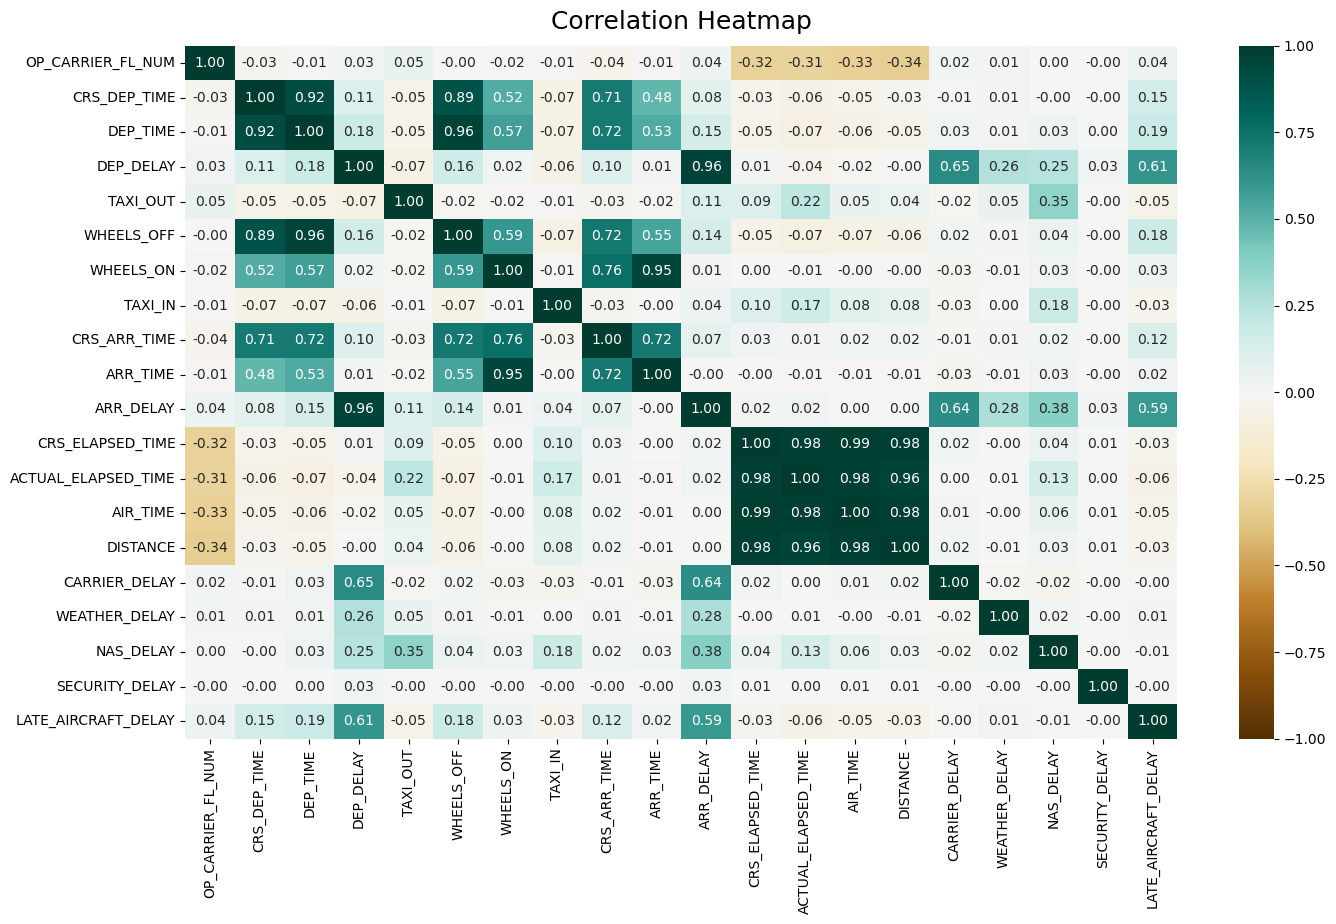

In [51]:
# Display a correlation matrix between the rows of the dataset.
correlation_matrix = flights.corr()

plot.figure(figsize = (16, 9))
heatmap = sb.heatmap(correlation_matrix, vmin = -1, vmax = 1, annot = True, fmt = '.2f', cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 18}, pad = 12)

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

Clean the dataset of all remaining NaN values:

In [51]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
# Remove any remaining NaNs.
azdias_remaining_missing_data = Imputer(missing_values = np.nan, strategy = 'mean')
azdias_clean = pd.DataFrame(azdias_remaining_missing_data.fit_transform(azdias_clean), columns = azdias_clean.columns)

Show the number of missing data to confirm whether any further cleaning is required:

In [52]:
# Display the number of missing data.
print(count_nan(azdias_clean))

0


Here the number of missing data is 0, so no further cleaning is required.

Apply the feature scaling to the data:

In [53]:
# Apply feature scaling to the general population demographics data.
scaler = StandardScaler()
azdias_clean = pd.DataFrame(scaler.fit_transform(azdias_clean), columns = azdias_clean.columns)

### Discussion 2.1: Apply Feature Scaling

The data was cleaned prior to this step. Any remaining NaNs are cleaned via imputing. The missing data were replaced with the *mean* using the `Imputer`. `StandardScaler` was used to scale all features, so that its distribution will have a *mean* of 0 and a *standard deviation* of 1. The number of missing data was calculated to see if any further cleaning was required.  The number of missing data was 0, so no further cleaning is required.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

Apply PCA to the dataset without any parameters as instructed:

In [54]:
# Apply PCA to the dataset.
pca = PCA()
azdias_clean_pca = pca.fit_transform(azdias_clean)

Show a chart of the variance explained by each component:

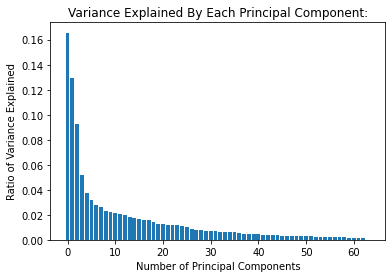

In [55]:
# Investigate the variance explained by each principal component.
plot.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plot.title('Variance Explained By Each Principal Component:')
plot.xlabel("Number of Principal Components")
plot.ylabel("Ratio of Variance Explained")

# Display the chart.
plot.show()

Show a chart of the cumulative variance explained:

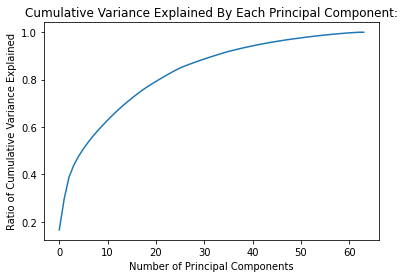

In [56]:
plot.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), '-')
plot.title('Cumulative Variance Explained By Each Principal Component:')
plot.xlabel('Number of Principal Components')
plot.ylabel('Ratio of Cumulative Variance Explained')

# Display the chart.
plot.show()

As can be seen from the above chart, when the number of principal components is approximately 60, the ratio of cumulative variance explained is around 0.95. So, the value that I will retain for the clustering part of the project is 60.

Re-apply the PCA using the number of components to retain; in this case 60:

In [57]:
# Re-apply PCA to the data while selecting for the number of components to retain (in this case 60).
pca = PCA(n_components = 60)
azdias_clean_pca = pca.fit_transform(azdias_clean)

### Discussion 2.2: Perform Dimensionality Reduction

From the graph above, we see that using 60 as the number of components corresponds with approximately 95% cumulative variance explained.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

Define a function to determine PCA weights:

In [58]:
# HINT: Try defining a function here or in a new cell that you can reuse in the other cells.
def pca_weights(a_clean, pca, i):
    df = pd.DataFrame(pca.components_[i])
    df.index = a_clean.columns
    principal_component = 'Principal Component ' + str(i + 1)
    df.columns = [principal_component]
    weights = df.sort_values(by = [principal_component], ascending = False)
    return weights

Map weights for the first principal component and display those weights:

In [59]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
feature_weights_pc1 = pca_weights(azdias_clean, pca, 0)
print(feature_weights_pc1)

                       Principal Component 1
PLZ8_ANTG3                          0.232915
PLZ8_ANTG4                          0.225885
WEALTH                              0.211125
ORTSGR_KLS9                         0.204096
EWDICHTE                            0.202342
HH_EINKOMMEN_SCORE                  0.179875
FINANZ_HAUSBAUER                    0.164822
PLZ8_ANTG2                          0.158660
KBA05_ANTG4                         0.157482
ARBEIT                              0.148030
ANZ_HAUSHALTE_AKTIV                 0.140799
RELAT_AB                            0.139886
KBA05_ANTG3                         0.137843
FINANZ_SPARER                       0.134274
MOVEMENT                            0.105987
SEMIO_PFLICHT                       0.105051
SEMIO_REL                           0.096772
DECADE                              0.089102
SEMIO_RAT                           0.086415
SEMIO_TRADV                         0.075254
REGIOTYP                            0.073626
SEMIO_MAT 

Map weights for the second principal component and display those weights:

In [60]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
feature_weights_pc2 = pca_weights(azdias_clean, pca, 1)
print(feature_weights_pc2)

                       Principal Component 2
ALTERSKATEGORIE_GROB                0.270977
FINANZ_VORSORGER                    0.251018
SEMIO_ERL                           0.225109
SEMIO_LUST                          0.185637
RETOURTYP_BK_S                      0.172622
W_KEIT_KIND_HH                      0.125396
FINANZ_HAUSBAUER                    0.107974
FINANZ_MINIMALIST                   0.090046
EWDICHTE                            0.084480
PLZ8_ANTG3                          0.084230
ORTSGR_KLS9                         0.083100
PLZ8_ANTG4                          0.080515
WEALTH                              0.066647
WOHNDAUER_2008                      0.066517
HH_EINKOMMEN_SCORE                  0.064866
ARBEIT                              0.062924
KBA05_ANTG4                         0.062696
SEMIO_KAEM                          0.061869
SEMIO_KRIT                          0.061865
RELAT_AB                            0.060447
ANZ_HAUSHALTE_AKTIV                 0.058186
PLZ8_ANTG2

Map weights for the third principal component and display those weights:

In [61]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
feature_weights_pc3 = pca_weights(azdias_clean, pca, 2)
print(feature_weights_pc3)

                       Principal Component 3
SEMIO_VERT                          0.353607
SEMIO_SOZ                           0.291003
SEMIO_KULT                          0.282852
SEMIO_FAM                           0.238198
FINANZ_MINIMALIST                   0.134382
RETOURTYP_BK_S                      0.080070
SEMIO_MAT                           0.068504
W_KEIT_KIND_HH                      0.066994
FINANZ_VORSORGER                    0.064333
SEMIO_REL                           0.059937
GREEN_AVANTGARDE                    0.057202
ALTERSKATEGORIE_GROB                0.040492
PLZ8_ANTG4                          0.034605
PLZ8_ANTG3                          0.033773
ORTSGR_KLS9                         0.033733
EWDICHTE                            0.032206
ARBEIT                              0.027182
HH_EINKOMMEN_SCORE                  0.026170
RELAT_AB                            0.023782
WEALTH                              0.022353
PLZ8_ANTG2                          0.021960
WOHNDAUER_

### Discussion 2.3: Interpret Principal Components

For each of the three principal components, I have listed the features with the top two positive correlations and the bottom two negative correlations. For each feature I have listed its description (as described in the data dictionary) and weight.

#### First principal component              

| Component: | Data Dictionary: | Weight: |
| :- | :- | :- |
|PLZ8_ANTG3|Number of 6-10 family houses in the PLZ8 region.|0.232915|
|PLZ8_ANTG4|Number of 10+ family houses in the PLZ8 region.|0.225885|

From the features that are positively correlated with the first principal component we see that the number of 6-10 family houses and 10+ houses increase when the first principal component increases.

| Component: | Data Dictionary: | Weight: |
| :- | :- | :- |
|PLZ8_ANTG1|Number of 1-2 family homes in the PLZ8 region.|-0.232261|
|MOBI_REGIO|Movement patterns.|-0.247236|

From the features that are negatively correlated with the first principal component we see that the number of 1-2 family homes and movement patterns decrease when the first principal component increases.

This principal component is about residential information and, to a lesser extent, movement patterns.

#### Second principal component

| Component: | Data Dictionary:| Weight: |
| :- | :- | :- |
|ALTERSKATEGORIE_GROB|Estimated age based on given name analysis.|0.270977|
|FINANZ_VORSORGER|Financial topology - be prepared.|0.251018|

From the features that are positively correlated with the second principal component we see that the estimated age based on a given name analysis and a be prepared financial view increase when the second principal component increases.

| Component: | Data Dictionary: | Weight: |
| :- | :- | :- |
|FINANZ_SPARER|Financial topology - money-saver.|-0.257439|
|DECADE|Generation by decade.|-0.264504|

From the features that are negatively correlated with the second principal component we see that a money-saver financial view and generation by decade decrease when the second principal component increases.

This principal component is about age and financial saving.

#### Third principal component

| Component: | Data Dictionary: | Weight: |
| :- | :- | :- |
|SEMIO_VERT|Personality topology - dreamful.|0.353607|
|SEMIO_SOZ|Personality topology - socially-minded.|0.291003|

From the features that are positively correlated with the third principal component we see that the dreamful personality type and socially-minded personality type increase when the third principal component increases.

| Component: | Data Dictionary: | Weight: |
| :- | :- | :- |
|SEMIO_KAEM|Personality topology - combative attitude.|-0.360295|
|ANREDE_KZ|Gender.|-0.362642|

From the features that are negatively correlated with the third principal component we see that a combative attitude personality type and gender decrease when the third principal component increases.

This principal component is about personality types and, to a lesser extent, gender.

**Note:** In general, all of the correlation values are considered, at best, weakly correlated to their respective principal component.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

Define a function to calculate the KMeans:

In [62]:
# Function to provide KMeans.
def k_mean_score(data, cluster_count):
    kmeans = KMeans(n_clusters = cluster_count)
    model = kmeans.fit(data)
    score = np.abs(model.score(data))
    print(cluster_count, score)
    return score

Run k-means clustering over a number of different cluster counts - 1 to 10 inclusive (note that this took just over 7 minutes to run on my desktop PC - using the Udacity environment will mean it will take considerably longer):

In [63]:
# Over a number of different cluster counts...
    # run k-means clustering on the data and...    
    # compute the average within-cluster distances.
scores = []
clusters =list(range(1, 11))
for count in clusters:
    scores.append(k_mean_score(azdias_clean_pca, count))

1 50852119.01506464
2 44905589.279608555
3 41389263.2672632
4 39233415.690598674
5 37699287.18309455
6 36457115.586734034
7 35422925.186538026
8 34630840.294007115
9 33959118.77560963
10 33247615.25080023


Display a graph to visually obtain the cluster k value:

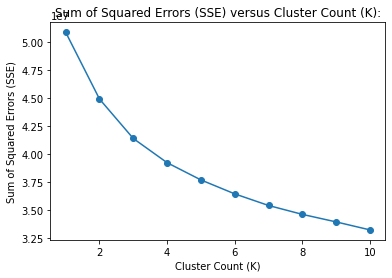

In [64]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plot.plot(clusters, scores, linestyle = '-', marker = 'o')
plot.xlabel('Cluster Count (K)')
plot.ylabel('Sum of Squared Errors (SSE)')
plot.title('Sum of Squared Errors (SSE) versus Cluster Count (K):')
plot.show()

From visual inspection it looks like a good value for K is 7, since after 7, the distance between cluster counts look uniform.

Re-fit the K-mean model with the chosen K value (number of clusters), which is 7.  Obtain the clusters prediction:

In [65]:
# Re-fit the K-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
#
# NOTE: The random_state parameter uses a randomly chosen 4 digit number to
#       seed the KMeans function so that the prediction results will be consistent
#       from run to run.
kmeans = KMeans(n_clusters = 7, random_state = 5683)

In [66]:
# Calculate the model.
model_7 = kmeans.fit(azdias_clean_pca)

In [67]:
# Calculate the prediction values.
azdias_clusters_prediction = model_7.predict(azdias_clean_pca)

Display the newly obtained cluster prediction:

In [68]:
# Display the cluster prediction for the general population demographic data.
print(azdias_clusters_prediction)

[1 6 2 ... 5 6 2]


### Discussion 3.1: Apply Clustering to General Population

K = 7 looks (via a visual inspection) to be the point at which the distance between cluster counts looks uniform. So, 7 clusters will be used.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

Load in the customer demographics data.

In [69]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep = ';')

Use the previously defined `clean_data` function to clean the customer data:

In [70]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers_clean = clean_data(customers)

Start clean_data function:
dataset shape = (191652, 85)
features dataset shape = (85, 4)

Converted the missing data to NaNs.

Remove outliers:
['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
Removed outliers.

Removed data with more than or equal to 25 missing data.

Remove multi-level features, and re-encode OST_WEST_KZ feature:
CJT_GESAMTTYP
FINANZTYP
GFK_URLAUBERTYP
LP_FAMILIE_FEIN
LP_FAMILIE_GROB
LP_STATUS_FEIN
LP_STATUS_GROB
NATIONALITAET_KZ
SHOPPER_TYP
ZABEOTYP
GEBAEUDETYP
CAMEO_DEUG_2015
CAMEO_DEU_2015
Removed multi-level features, and re-encoded OST_WEST_KZ feature with {'W': 0, 'O': 1} .

Added new columns derived from engineering columns.

Removed original engineered columns (rows for feature_data dataset).

Remove mixed features:
LP_LEBENSPHASE_FEIN
LP_LEBENSPHASE_GROB
WOHNLAGE
PLZ8_BAUMAX
Removed mixed features.

Removed any remaining NaNs.

dataset shape = (141701, 64)
feature dataset shape = (77, 4)
Finished clean_data function.


Apply the scaler transformation:

In [71]:
# Apply feature scaling to the customers data.
customers_clean = pd.DataFrame(scaler.transform(customers_clean), columns = customers_clean.columns)

Perform the PCA transformation:

In [72]:
# Apply PCA to the data while selecting for the number of components to retain (in this case 60).
customers_clean_pca = pca.transform(customers_clean)

Determine the customers clusters prediction:

In [73]:
# Predict using K-means model_7 derived previously.
customers_clusters_prediction = model_7.predict(customers_clean_pca)

Display the customers clusters prediction:

In [74]:
# Display the customers clusters prediction.
print(customers_clusters_prediction)

[3 3 0 ... 0 3 2]


### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

Create proportion data for the general population and customers data so that they can be compared:

In [75]:
# Calculate the proportion of data in each cluster for the customer data to the 
# proportion of data in each cluster for the general population.
azdias_proportion = []
customers_proportion = []
k = 7 # Number of clusters (previously determined).
azdias_prediction_length = len(azdias_clusters_prediction)
customers_prediction_length = len(customers_clusters_prediction)

clusters = [cluster for cluster in range(k)]

for cluster in range(k):
    azdias_proportion.append((azdias_clusters_prediction == cluster).sum() / azdias_prediction_length)
    customers_proportion.append((customers_clusters_prediction == cluster).sum() /customers_prediction_length)

Create a new dataset to hold the proportion data:

In [76]:
# Create a new dataset to hold the proportion data.
proportion_df = pd.DataFrame({'Customers Population': customers_proportion, 'General Population': azdias_proportion})

# Display the new dataset.
proportion_df.head(k)

,Customers Population,General Population
0,0.078779,0.123740
1,0.258848,0.209189
2,0.151806,0.159509
3,0.388854,0.165543
4,0.018948,0.100596
5,0.093598,0.122909
6,0.009167,0.118514


Calculate the proportion differences for each cluster and display that data:

In [77]:
# Calculate the difference between proportions for each cluster.
proportion_difference = proportion_df['Customers Population'] - proportion_df['General Population']

# Create a new dataset to hold the difference data.
proportion_difference_df = pd.DataFrame({'Difference': proportion_difference})

# Display the difference data.
proportion_difference_df.head(k)

,Difference
0,-0.044962
1,0.049659
2,-0.007703
3,0.223311
4,-0.081647
5,-0.029311
6,-0.109347


Positive values indicate overrepresented clusters and negative values indicate underrepresented clusters.  Based on the difference data, clusters 1 and 3 are overrepresented, whereas clusters 0, 2, 4, 5, and 6 are underrepresented.

Graph the proportion data so that the customer data and general population data can be easily compared:

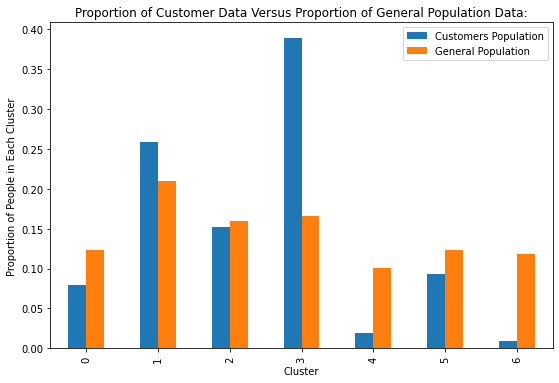

In [78]:
# Graph the proportion data.
proportion_df.plot(kind = 'bar', figsize = (9, 6))
plot.title('Proportion of Customer Data Versus Proportion of General Population Data:')
plot.xlabel('Cluster')
plot.ylabel('Proportion of People in Each Cluster')

# Display the chart.
plot.show()

From the graph it can be determined (by visual inspection) that cluster 3 is the most overrepresented cluster, and cluster 6 is the most underrepresented cluster.  This is also confirmed by looking at the previously generated difference data and noting the largest positive value (most overrepresented) and the smallest negative value (most underrepresented).

Determine the kinds of people that are overrepresented in the customer data compared to the general population using cluster 3:

In [79]:
# What kinds of people are part of a cluster that is overepresented in the
# customer data compared to the general population?
centroid_3 = scaler.inverse_transform(pca.inverse_transform(model_7.cluster_centers_[3]))
overrepresented_df = pd.Series(data = centroid_3, index = customers_clean.columns)

# Display items of the overrepresented data.
overrepresented_df

ALTERSKATEGORIE_GROB        3.430133
ANREDE_KZ                   1.002482
FINANZ_MINIMALIST           4.591851
FINANZ_SPARER               1.726930
FINANZ_VORSORGER            4.212032
FINANZ_ANLEGER              1.915580
FINANZ_UNAUFFAELLIGER       2.050437
FINANZ_HAUSBAUER            2.008050
GREEN_AVANTGARDE            0.368815
HEALTH_TYP                  2.175995
RETOURTYP_BK_S              3.839512
SEMIO_SOZ                   4.622728
SEMIO_FAM                   4.658601
SEMIO_REL                   3.734044
SEMIO_MAT                   3.586786
SEMIO_VERT                  6.022477
SEMIO_LUST                  4.959165
SEMIO_ERL                   4.167631
SEMIO_KULT                  4.949326
SEMIO_RAT                   2.797210
SEMIO_KRIT                  3.464418
SEMIO_DOM                   3.354617
SEMIO_KAEM                  2.714661
SEMIO_PFLICHT               3.192550
SEMIO_TRADV                 3.114560
SOHO_KZ                     0.009018
VERS_TYP                    1.549392
A

Determine the kinds of people that are underrepresented in the customer data compared to the general population using cluster 6:

In [80]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
centroid_6 = scaler.inverse_transform(pca.inverse_transform(model_7.cluster_centers_[6]))
underrepresented_df = pd.Series(data = centroid_6, index = customers_clean.columns)

# Display items of the underrepresented data.
underrepresented_df

ALTERSKATEGORIE_GROB        1.840355
ANREDE_KZ                   1.611599
FINANZ_MINIMALIST           1.379519
FINANZ_SPARER               4.377067
FINANZ_VORSORGER            2.079273
FINANZ_ANLEGER              3.911499
FINANZ_UNAUFFAELLIGER       3.681939
FINANZ_HAUSBAUER            4.085311
GREEN_AVANTGARDE            0.043723
HEALTH_TYP                  2.274679
RETOURTYP_BK_S              2.727814
SEMIO_SOZ                   4.564854
SEMIO_FAM                   5.105932
SEMIO_REL                   5.909284
SEMIO_MAT                   4.913640
SEMIO_VERT                  3.623474
SEMIO_LUST                  3.054743
SEMIO_ERL                   3.551041
SEMIO_KULT                  5.269627
SEMIO_RAT                   5.406556
SEMIO_KRIT                  4.497244
SEMIO_DOM                   4.921887
SEMIO_KAEM                  4.886891
SEMIO_PFLICHT               6.105091
SEMIO_TRADV                 5.280104
SOHO_KZ                     0.007732
VERS_TYP                    1.493552
A

### Discussion 3.3: Compare Customer Data to Demographics Data

**Observations:**

Clusters 1 and 3 are popular (overrepresented) with the mail-order company. Cluster 3 is the most overrepresented.

Clusters 0, 2, 4, 5, and 6 are unpopular (underrepresented) with the mail-order company. Cluster 6 is the most underepresented.

**Conclusions:**

Looking at the first eight features (with feature definitions from the data dictionary) for cluster 3 shows that the people in this cluster tend to be older (46 to 60 years old), male, very low to low in *low* financial interest, high to very high in money saving, very low to low in being prepared, high to very high in investing, average to high in inconspicuousness, and average to high in home ownership.

Looking at the first eight features (with data definitions from the data dictionary) for cluster 6 shows that the people in this cluster tend to be young (less than 30 years old), male, high to very high in *low* financial interest, very low to low in money saving, average to high in being prepared, low to average in investing, low to average in inconspicuousness, and very low to low in home ownership.

In summary, the data would infer that customers that are popular with the mail order company are older, inclined to make good financial decisions (in the present and the future), and likely own their own homes.  Customers that are unpopular with the mail order company are younger, financially less sophisticated (make less good financial decisions for the present and the future), and likely do not own their own home.